In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('IPL Dataset.csv')
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0


In [63]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type', 'player_dismissed', 'run', 'over'],
      dtype='object')

In [64]:
df.shape

(194354, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

In [6]:
df.season.min(),df.season.max()

(2008, 2021)

In [7]:
df.isnull().sum()

match_id            0
season              0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
wicket_type         0
player_dismissed    0
run                 0
over                0
dtype: int64

In [8]:
df.wicket_type.value_counts()

                         184794
caught                     5766
bowled                     1714
run out                     905
lbw                         579
stumped                     294
caught and bowled           277
hit wicket                   12
retired hurt                 11
obstructing the field         2
Name: wicket_type, dtype: int64

In [9]:
df.player_dismissed.value_counts()

                     184794
RG Sharma               168
RV Uthappa              165
SK Raina                163
V Kohli                 155
                      ...  
Mohammad Ashraful         1
DR Martyn                 1
B Sumanth                 1
D Kalyankrishna           1
SS Shaikh                 1
Name: player_dismissed, Length: 511, dtype: int64

In [10]:
#team total scores

In [11]:
team_runs=df.groupby(['batting_team'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='Runs_scored')
team_runs

,batting_team,Runs_scored
0,Mumbai Indians,30742
1,Royal Challengers Bangalore,28930
2,Kings XI Punjab,28541
3,Kolkata Knight Riders,27978
4,Chennai Super Kings,27140
5,Rajasthan Royals,23360
6,Delhi Daredevils,23022
7,Sunrisers Hyderabad,18588
8,Deccan Chargers,10885
9,Pune Warriors,6040


In [12]:
#indiviual player total runs as striker

In [13]:
team_runs_player=df.groupby(['batting_team','non_striker'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='Runs_scored_players')
team_runs_player['ranking']=team_runs_player['Runs_scored_players'].rank(method='dense',ascending=False)
team_runs_player[team_runs_player['ranking']<=5]

,batting_team,non_striker,Runs_scored_players,ranking
0,Royal Challengers Bangalore,V Kohli,5989,1.0
1,Chennai Super Kings,SK Raina,4404,2.0
2,Mumbai Indians,RG Sharma,4154,3.0
3,Royal Challengers Bangalore,AB de Villiers,3655,4.0
4,Chennai Super Kings,MS Dhoni,3650,5.0


In [14]:
team_wickets=df.groupby(['bowling_team'])['wicket_type'].count().sort_values(ascending=False).reset_index(name='wickets_taken')
team_wickets

,bowling_team,wickets_taken
0,Mumbai Indians,24607
1,Royal Challengers Bangalore,23167
2,Kolkata Knight Riders,22727
3,Kings XI Punjab,22483
4,Chennai Super Kings,21344
5,Rajasthan Royals,19120
6,Delhi Daredevils,18725
7,Sunrisers Hyderabad,14839
8,Deccan Chargers,9039
9,Pune Warriors,5457


In [15]:
wickets_indiviual=df.groupby(['bowling_team','bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index(name='wickets_taken')
wickets_indiviual['ranking']=wickets_indiviual['wickets_taken'].rank(method='dense',ascending=False)
wickets_indiviual[wickets_indiviual['ranking']<=5]

,bowling_team,bowler,wickets_taken,ranking
0,Mumbai Indians,Harbhajan Singh,2989,1.0
1,Mumbai Indians,SL Malinga,2974,2.0
2,Kolkata Knight Riders,SP Narine,2830,3.0
3,Mumbai Indians,JJ Bumrah,2207,4.0
4,Royal Challengers Bangalore,YS Chahal,2188,5.0


In [16]:
def bowlers_wickets(team):
    indiviual_team_bowling=df[df['bowling_team']==team]
    indiviual_team_bowling=indiviual_team_bowling.groupby(['bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index(name='Wickets')
    return indiviual_team_bowling
team_name=input('Team Name ').title()
bowlers_wickets(team_name)

Team Name mumbai indians


,bowler,Wickets
0,Harbhajan Singh,2989
1,SL Malinga,2974
2,JJ Bumrah,2207
3,KA Pollard,1414
4,MJ McClenaghan,1346
...,...,...
73,GJ Maxwell,12
74,AM Rahane,6
75,N Rana,6
76,STR Binny,6


In [17]:
def Run_scored(team):
    indiviual_team_batting=df[df['batting_team']==team]
    indiviual_team_batting=indiviual_team_batting.groupby(['non_striker'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='Runs scored')
    return indiviual_team_batting
team_name=input('Team Name ').title()
Run_scored(team_name)

Team Name mumbai indians


,non_striker,Runs scored
0,RG Sharma,4154
1,KA Pollard,2778
2,SR Tendulkar,2607
3,AT Rayudu,2556
4,SA Yadav,1263
...,...,...
93,Mohammad Ashraful,1
94,P Kumar,1
95,Rasikh Salam,1
96,M Jansen,0


In [18]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type', 'player_dismissed', 'run', 'over'],
      dtype='object')

In [19]:
# 1. List of Seasons
df['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019,
       2018, 2020, 2021], dtype=int64)

In [20]:
# 2. First ball of IPL history
df.iloc[0]

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                         0
noballs                                       0
byes                                          0
legbyes                                       1
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

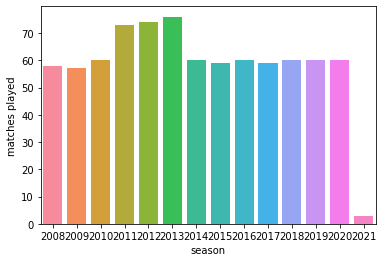

In [21]:
# 3. Season Wise IPL Matches
matches=df.groupby(['season'])['match_id'].nunique().reset_index(name='matches played')
#matches=matches.sort_values(by='season',ascending=True)
sns.barplot(x=matches['season'],y=matches['matches played'],saturation=0.95)
plt.show()

In [22]:
# 4. Most IPL Matches played in a Venue 
df.groupby(['venue'])['match_id'].nunique().sort_values(ascending=False).reset_index(name='matches played')

,venue,matches played
0,M.Chinnaswamy Stadium,80
1,Eden Gardens,77
2,"Wankhede Stadium, Mumbai",74
3,Arun Jaitley Stadium,74
4,"Rajiv Gandhi International Stadium, Uppal",64
5,"MA Chidambaram Stadium, Chepauk, Chennai",59
6,"Punjab Cricket Association IS Bindra Stadium, ...",56
7,Sawai Mansingh Stadium,47
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


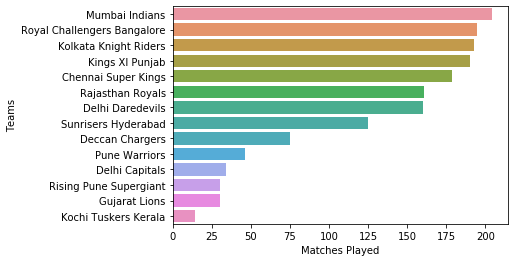

In [23]:
# 5. IPL Matches Played by Each Team
team_matches=df.groupby(['bowling_team'])['match_id'].nunique().sort_values(ascending=False).reset_index(name='total_matches')
team_matches
sns.barplot(y=team_matches['bowling_team'],x=team_matches['total_matches'])
plt.ylabel('Teams')
plt.xlabel('Matches Played')
plt.show()

# IPL Batting Analysis

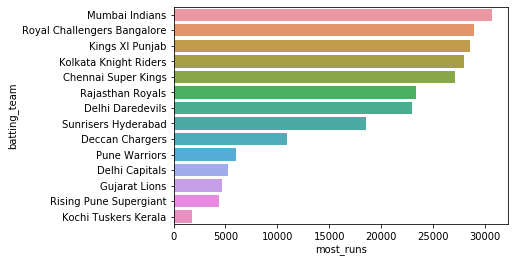

In [24]:
# 6. Most Run Scored by IPL Teams
team_runs=df.groupby(['batting_team'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='most_runs') 
sns.barplot(y=team_runs['batting_team'],x=team_runs['most_runs'])
plt.show()

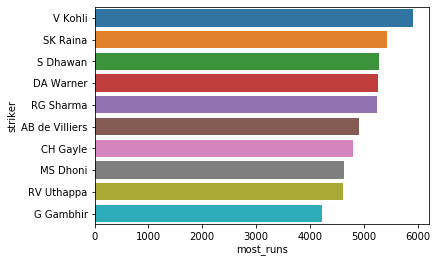

In [25]:
# 7. Most IPL Runs by a Batsman
player_runs=df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='most_runs')[:10]
sns.barplot(y=player_runs['striker'],x=player_runs['most_runs'])
plt.show()

In [125]:
# 8. Avg Run by Teams in Powerplay
powerplay=df[df['over']<6]
pp_runs=powerplay.groupby(['match_id','batting_team'])['run'].sum().reset_index(name='runs')
pp_avg=pp_runs.groupby(['batting_team'])['runs'].mean().sort_values(ascending=False).reset_index(name='AVG_runs')
np.round(pp_avg,2)

,batting_team,AVG_runs
0,Gujarat Lions,51.97
1,Kochi Tuskers Kerala,48.57
2,Delhi Capitals,48.18
3,Sunrisers Hyderabad,47.86
4,Rising Pune Supergiant,47.43
5,Kings XI Punjab,47.13
6,Kolkata Knight Riders,46.41
7,Delhi Daredevils,45.71
8,Deccan Chargers,45.56
9,Mumbai Indians,45.53


In [27]:
# 9. Most IPL Century by a Player
most_runs=df.groupby(['match_id','batting_team','striker'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='runs')     
century=most_runs[most_runs['runs']>=100]
century.groupby(['striker'])['runs'].count().sort_values(ascending=False).reset_index(name='centuries')

,striker,centuries
0,CH Gayle,6
1,V Kohli,5
2,SR Watson,4
3,DA Warner,4
4,AB de Villiers,3
5,BA Stokes,2
6,S Dhawan,2
7,M Vijay,2
8,HM Amla,2
9,BB McCullum,2


In [28]:
# 10. Most IPL Fifty by Player
most_runs=df.groupby(['match_id','batting_team','striker'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='runs')     
half_century=most_runs[most_runs['runs']>=50]
half_century=half_century.groupby(['striker'])['runs'].count().sort_values(ascending=False).reset_index(name='Half-centuries')
half_century[:10]

,striker,Half-centuries
0,DA Warner,52
1,V Kohli,45
2,S Dhawan,44
3,AB de Villiers,42
4,RG Sharma,40
5,SK Raina,40
6,CH Gayle,38
7,G Gambhir,36
8,AM Rahane,30
9,SR Watson,25


In [29]:
# 11. Orange Cap Holder Each Season
most_runs=df.groupby(['match_id','season','striker'])['runs_off_bat'].sum().reset_index(name='runs')
most_runs=most_runs.groupby(['season','striker'])['runs'].sum().reset_index(name='most_runs')
most_runs['ranking']=most_runs.groupby(['season'])['most_runs'].rank(method='dense',ascending=False)
ranks=most_runs[most_runs['ranking']==1].sort_values(by='season',ascending=True)
ranks

,season,striker,most_runs,ranking
115,2008,SE Marsh,616,1.0
229,2009,ML Hayden,572,1.0
446,2010,SR Tendulkar,618,1.0
502,2011,CH Gayle,608,1.0
684,2012,CH Gayle,733,1.0
910,2013,MEK Hussey,733,1.0
1088,2014,RV Uthappa,660,1.0
1148,2015,DA Warner,562,1.0
1383,2016,V Kohli,973,1.0
1422,2017,DA Warner,641,1.0


In [30]:
# 12. Most Sixes in an IPL Inning
sixes=df[df['runs_off_bat']==6]
six=sixes.groupby(['match_id','striker'])['runs_off_bat'].count().reset_index(name='most_sixes')
six.sort_values(by='most_sixes',ascending=False)[:10]

,match_id,striker,most_sixes
1765,598027,CH Gayle,17
0,335982,BB McCullum,13
1586,548372,CH Gayle,13
2947,980987,AB de Villiers,12
2595,829785,CH Gayle,12
3420,1136565,AD Russell,11
765,419137,M Vijay,11
208,336018,ST Jayasuriya,11
3503,1136576,CH Gayle,11
3467,1136571,SV Samson,10


In [31]:
# 13.who scored Most Sixes in an each IPL
sixes=df[df['runs_off_bat']==6]
sixes=sixes.groupby(['season','batting_team','striker'])['runs_off_bat'].count().reset_index(name='most_sixes')
sixes['ranking']=sixes.groupby(['season'])['most_sixes'].rank(method='dense',ascending=False)
sixes[sixes['ranking']==1]

,season,batting_team,striker,most_sixes,ranking
70,2008,Mumbai Indians,ST Jayasuriya,31,1.0
109,2009,Deccan Chargers,AC Gilchrist,29,1.0
266,2010,Royal Challengers Bangalore,RV Uthappa,27,1.0
357,2011,Royal Challengers Bangalore,CH Gayle,44,1.0
464,2012,Royal Challengers Bangalore,CH Gayle,59,1.0
548,2013,Royal Challengers Bangalore,CH Gayle,52,1.0
588,2014,Kings XI Punjab,GJ Maxwell,36,1.0
718,2015,Royal Challengers Bangalore,CH Gayle,38,1.0
820,2016,Royal Challengers Bangalore,V Kohli,38,1.0
860,2017,Kings XI Punjab,GJ Maxwell,26,1.0


In [32]:
# 14.No. of Sixes in IPL Seasons
sixes=df[df['runs_off_bat']==6]
sixes=sixes.groupby(['season'])['runs_off_bat'].count().reset_index(name='most_sixes')
sixes.sort_values(by='most_sixes',ascending=False)

,season,most_sixes
10,2018,872
11,2019,786
12,2020,736
4,2012,733
6,2014,715
9,2017,706
7,2015,692
5,2013,681
3,2011,639
8,2016,639


In [33]:
# 14.No. of Sixes in IPL Seasons by a batsman
sixes=df[df['runs_off_bat']==6]
sixes=sixes.groupby(['striker'])['runs_off_bat'].count().reset_index(name='most_sixes')
sixes.sort_values(by='most_sixes',ascending=False)[:10]

,striker,most_sixes
63,CH Gayle,351
11,AB de Villiers,239
202,MS Dhoni,216
251,RG Sharma,215
332,V Kohli,202
286,SK Raina,199
145,KA Pollard,199
74,DA Warner,195
301,SR Watson,190
266,RV Uthappa,163


In [34]:
# 15. Most Boundary (4s) hit by a Batsman
fours=df[df['runs_off_bat']==4]
fours=fours.groupby(['striker'])['runs_off_bat'].count().reset_index(name='most_sixes')
fours.sort_values(by='most_sixes',ascending=False)[:10]

,striker,most_sixes
330,S Dhawan,601
401,V Kohli,510
91,DA Warner,510
351,SK Raina,496
123,G Gambhir,492
306,RG Sharma,459
323,RV Uthappa,454
35,AM Rahane,416
19,AB de Villiers,395
78,CH Gayle,387


In [35]:
# 16. Most runs in an IPL season by Player
runs=df.groupby(['season','batting_team','striker'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='most_runs')
runs[:10]

,season,batting_team,striker,most_runs
0,2016,Royal Challengers Bangalore,V Kohli,973
1,2016,Sunrisers Hyderabad,DA Warner,848
2,2018,Sunrisers Hyderabad,KS Williamson,735
3,2013,Chennai Super Kings,MEK Hussey,733
4,2012,Royal Challengers Bangalore,CH Gayle,733
5,2013,Royal Challengers Bangalore,CH Gayle,720
6,2019,Sunrisers Hyderabad,DA Warner,692
7,2016,Royal Challengers Bangalore,AB de Villiers,687
8,2018,Delhi Daredevils,RR Pant,684
9,2020,Kings XI Punjab,KL Rahul,676


In [36]:
# Highest Total by IPL Teams
high_total=df.groupby(['match_id','season','batting_team','bowling_team'])['run'].sum().reset_index(name='total_runs')
high_total.sort_values(by='total_runs',ascending=False)[:10]

,match_id,season,batting_team,bowling_team,total_runs
702,598027,2013,Royal Challengers Bangalore,Pune Warriors,263
1119,980987,2016,Royal Challengers Bangalore,Gujarat Lions,248
292,419137,2010,Chennai Super Kings,Rajasthan Royals,246
1357,1136604,2018,Kolkata Knight Riders,Kings XI Punjab,245
2,335983,2008,Chennai Super Kings,Kings XI Punjab,240
1003,829795,2015,Royal Challengers Bangalore,Mumbai Indians,235
472,501260,2011,Kings XI Punjab,Royal Challengers Bangalore,232
1482,1178422,2019,Kolkata Knight Riders,Mumbai Indians,232
398,501223,2011,Delhi Daredevils,Kings XI Punjab,231
1411,1175366,2019,Sunrisers Hyderabad,Royal Challengers Bangalore,231


In [37]:
# Highest Individual IPL Score
df.groupby(['match_id','striker'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='most_runs')[:10]

,match_id,striker,most_runs
0,598027,CH Gayle,175
1,335982,BB McCullum,158
2,829795,AB de Villiers,133
3,1216510,KL Rahul,132
4,980987,AB de Villiers,129
5,548372,CH Gayle,128
6,1136602,RR Pant,128
7,419137,M Vijay,127
8,1082627,DA Warner,126
9,734047,V Sehwag,122


# Bowling Statistics

In [61]:
# 19. Most run conceded by a bowler in an inning
df.groupby(['match_id','bowler'])['run'].sum().sort_values(ascending=False).reset_index(name='most_runs')[:10]

,match_id,bowler,most_runs
0,1136611,Basil Thampi,70
1,1178423,Mujeeb Ur Rahman,66
2,734007,Sandeep Sharma,66
3,598051,I Sharma,66
4,598054,UT Yadav,65
5,1082635,PJ Cummins,65
6,1216541,AS Rajpoot,64
7,1216538,S Kaul,64
8,548380,VR Aaron,63
9,1216517,TA Boult,63


In [39]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'wicket_type', 'player_dismissed', 'run', 'over'],
      dtype='object')

In [40]:
df.wicket_type.value_counts()

                         184794
caught                     5766
bowled                     1714
run out                     905
lbw                         579
stumped                     294
caught and bowled           277
hit wicket                   12
retired hurt                 11
obstructing the field         2
Name: wicket_type, dtype: int64

In [41]:
# 20. Purple Cap Holders
most_wkt=df[df['wicket_type'].isin(['caught','bowled','lbw','stumped','caught and bowled','hit wicket'])].drop_duplicates()
most_wkt=most_wkt.groupby(['season','bowler'])['wicket_type'].count().reset_index(name='mst_wkts')
most_wkt['ranks']=most_wkt.groupby(['season'])['mst_wkts'].rank(method='dense',ascending=False)
most_wkt=most_wkt[most_wkt['ranks']==1]
most_wkt.iloc[:,:-1].sort_values(by='mst_wkts',ascending=False)

,season,bowler,mst_wkts
509,2013,DJ Bravo,32
1142,2020,K Rabada,32
367,2011,SL Malinga,28
695,2015,DJ Bravo,26
861,2017,B Kumar,26
1049,2019,Imran Tahir,26
1058,2019,K Rabada,26
437,2012,M Morkel,25
943,2018,AJ Tye,24
152,2009,RP Singh,23


In [42]:
# 21. Most IPL Wickets by a Bowler
most_wkt=df[df['wicket_type'].isin(['caught','bowled','lbw','stumped','caught and bowled','hit wicket'])].drop_duplicates()
most_wkt.groupby(['bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index(name='most_wkts')[:10]

,bowler,most_wkts
0,SL Malinga,170
1,A Mishra,160
2,PP Chawla,156
3,DJ Bravo,154
4,Harbhajan Singh,150
5,R Ashwin,139
6,B Kumar,137
7,SP Narine,127
8,YS Chahal,121
9,UT Yadav,119


In [43]:
# 22. Most Dot Ball by a Bowler
dot_ball=df[df['run']==0]
dot_ball.groupby(['bowler'])['run'].count().sort_values(ascending=False).reset_index(name='most_dot_balls')[:10]

,bowler,most_dot_balls
0,Harbhajan Singh,1247
1,R Ashwin,1174
2,B Kumar,1165
3,SL Malinga,1144
4,PP Chawla,1137
5,A Mishra,1129
6,SP Narine,1100
7,P Kumar,1075
8,DW Steyn,1019
9,UT Yadav,955


In [44]:
# 23. Most Maiden over by a Bowler
no_runs=df.groupby(['match_id','bowler','over'])['run'].sum().sort_values(ascending=True).reset_index(name='no_runs') 
no_runs=no_runs[no_runs['no_runs']==0]
no_runs.groupby(['bowler'])['over'].count().sort_values(ascending=False)[:10]
 

bowler
P Kumar           12
IK Pathan          9
SL Malinga         8
DW Steyn           8
DS Kulkarni        7
B Kumar            7
DJ Bravo           6
Sandeep Sharma     6
Z Khan             5
DL Chahar          5
Name: over, dtype: int64

In [126]:
# 24. Most Wickets by an IPL Team
most_wkt=df[df['wicket_type'].isin(['caught','bowled','lbw','stumped','caught and bowled','hit wicket','run out'])].drop_duplicates()
most_wkt.groupby(['bowling_team'])['wicket_type'].count().sort_values(ascending=False).reset_index(name='most_wkts')[:10]

,bowling_team,most_wkts
0,Mumbai Indians,1249
1,Royal Challengers Bangalore,1123
2,Chennai Super Kings,1107
3,Kolkata Knight Riders,1087
4,Kings XI Punjab,1074
5,Rajasthan Royals,920
6,Delhi Daredevils,911
7,Sunrisers Hyderabad,757
8,Deccan Chargers,446
9,Pune Warriors,237


In [46]:
# 25. Most No Balls by an IPL team
df1=df[df['noballs']!=0]
mst_no_balls=df1.groupby(['batting_team'])['noballs'].sum().sort_values(ascending=False)
mst_no_balls

batting_team
Royal Challengers Bangalore    106.0
Mumbai Indians                  96.0
Chennai Super Kings             96.0
Rajasthan Royals                94.0
Kolkata Knight Riders           90.0
Delhi Daredevils                73.0
Kings XI Punjab                 71.0
Sunrisers Hyderabad             53.0
Deccan Chargers                 49.0
Pune Warriors                   24.0
Delhi Capitals                  21.0
Gujarat Lions                   17.0
Kochi Tuskers Kerala            11.0
Rising Pune Supergiant           8.0
Name: noballs, dtype: float64

In [47]:
#26. Most No Balls by an IPL Bowler
df1=df[df['noballs']!=0]['bowler'].value_counts()
df1[:10]

S Sreesanth    23
JJ Bumrah      23
A Mishra       21
I Sharma       21
UT Yadav       19
SL Malinga     18
AB Dinda       14
RP Singh       13
M Morkel       13
B Lee          13
Name: bowler, dtype: int64

In [128]:
#  27. Most run given by a team in Extras
df1=df[df['extras']!=0]
mst_extras=df1.groupby(['bowling_team'])['extras'].count().sort_values(ascending=False)
mst_extras

bowling_team
Mumbai Indians                 1365
Royal Challengers Bangalore    1311
Kings XI Punjab                1234
Kolkata Knight Riders          1146
Rajasthan Royals               1126
Chennai Super Kings            1068
Delhi Daredevils                999
Sunrisers Hyderabad             648
Deccan Chargers                 527
Pune Warriors                   235
Delhi Capitals                  190
Rising Pune Supergiant          182
Gujarat Lions                   160
Kochi Tuskers Kerala             90
Name: extras, dtype: int64

In [130]:
# 28. Most Wides Conceded by an IPL team
df1=df[df['wides']!=0]
mst_extras=df1.groupby(['bowling_team'])['wides'].count().sort_values(ascending=False)
mst_extras

bowling_team
Mumbai Indians                 808
Royal Challengers Bangalore    769
Kings XI Punjab                721
Rajasthan Royals               638
Kolkata Knight Riders          630
Chennai Super Kings            625
Delhi Daredevils               550
Sunrisers Hyderabad            363
Deccan Chargers                280
Pune Warriors                  120
Delhi Capitals                 119
Rising Pune Supergiant         118
Gujarat Lions                   91
Kochi Tuskers Kerala            52
Name: wides, dtype: int64

In [50]:
#draw matches list
df1=df.groupby(['match_id','start_date','season','batting_team','bowling_team'])['run'].sum().reset_index(name='Total_runs')
df1['ranks']=df1.groupby('match_id')['Total_runs'].rank(method='dense',ascending=False)
grp=df1[df1['ranks']==1].groupby(['match_id'])
filtered = grp.filter(lambda x: len(x) > 1)
filtered['ranks']='draw'  

# win matches list
grp_1=df1[df1['ranks']==1].groupby(['match_id'])
filtered_1 = grp_1.filter(lambda x: len(x)== 1)
filtered_1['ranks']='win'

# lost matches list
grp_2=df1[df1['ranks']==2].groupby(['match_id'])
filtered_2 = grp_2.filter(lambda x: len(x)== 1)
filtered_2['ranks']='loss'
len(filtered),len(filtered_1),len(filtered_2)

(2, 818, 816)

In [51]:
win_loss=pd.concat([filtered, filtered_1, filtered_2], axis=0, ignore_index=True)
win_loss

,match_id,start_date,season,batting_team,bowling_team,Total_runs,ranks
0,729315,2014-04-29,2014,Kolkata Knight Riders,Rajasthan Royals,163,draw
1,729315,2014-04-29,2014,Rajasthan Royals,Kolkata Knight Riders,163,draw
2,335982,2008-04-18,2008,Kolkata Knight Riders,Royal Challengers Bangalore,222,win
3,335983,2008-04-19,2008,Chennai Super Kings,Kings XI Punjab,240,win
4,335984,2008-04-19,2008,Delhi Daredevils,Rajasthan Royals,132,win
...,...,...,...,...,...,...,...
1631,1237180,2020-11-08,2020,Sunrisers Hyderabad,Delhi Capitals,172,loss
1632,1237181,2020-11-10,2020,Delhi Capitals,Mumbai Indians,156,loss
1633,1254058,2021-04-09,2021,Mumbai Indians,Royal Challengers Bangalore,159,loss
1634,1254059,2021-04-10,2021,Chennai Super Kings,Delhi Capitals,188,loss


In [52]:
win_loss.ranks.value_counts()

win     818
loss    816
draw      2
Name: ranks, dtype: int64

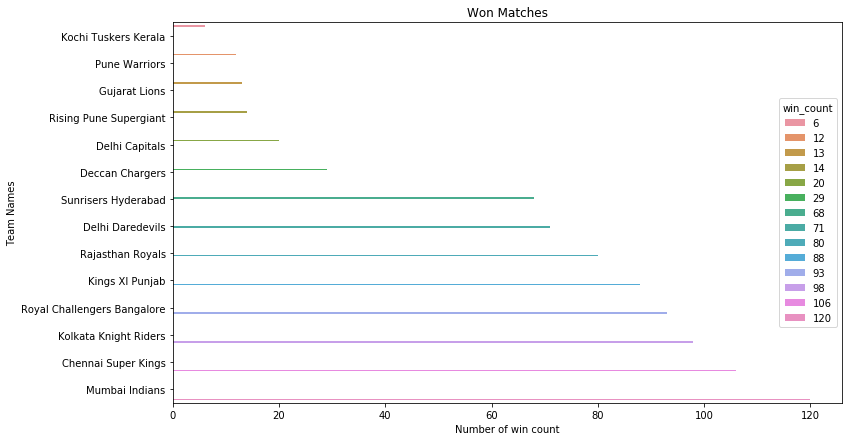

In [53]:
# How many matches a tem won
team_win_count=win_loss[win_loss['ranks']=='win']
team_win_count=team_win_count.groupby(['batting_team'])['ranks'].value_counts().sort_values(ascending=True).reset_index(name='win_count')
plt.figure(figsize=(12,7))
sns.barplot(x='win_count',y='batting_team',data=team_win_count,hue='win_count')
plt.xlabel('Number of win count')
plt.ylabel('Team Names')
plt.title('Won Matches')
plt.show()

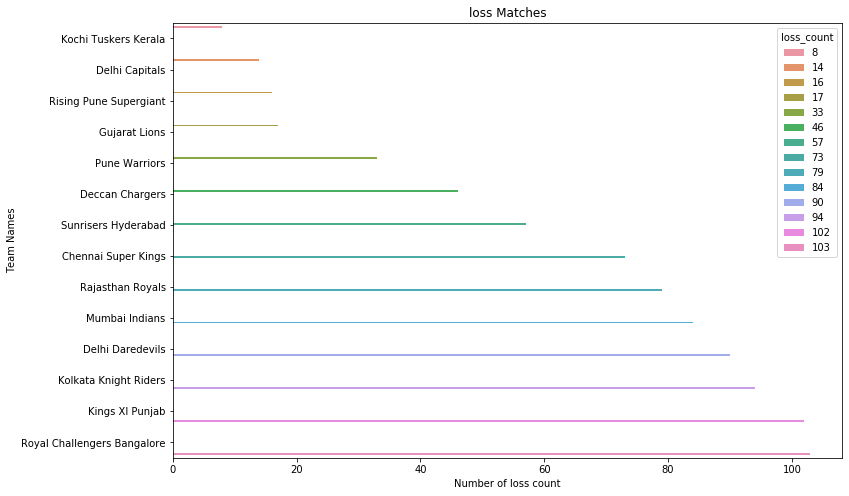

In [54]:
# how many matches a team loss
team_loss_count=win_loss[win_loss['ranks']=='loss']
team_loss_count=team_loss_count.groupby(['batting_team'])['ranks'].value_counts().sort_values(ascending=True).reset_index(name='loss_count')
plt.figure(figsize=(12,8))
sns.barplot(x='loss_count',y='batting_team',data=team_loss_count,hue='loss_count')
plt.xlabel('Number of loss count')
plt.ylabel('Team Names')
plt.title('loss Matches')
plt.show()

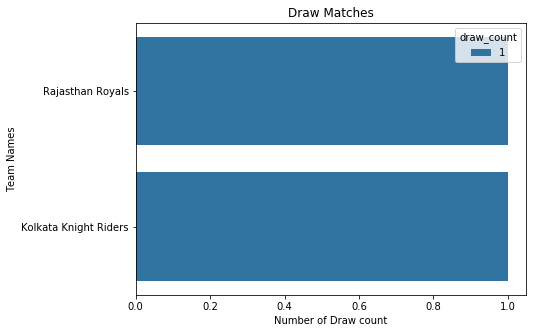

In [55]:
# how many draw matches of a team 
team_draw_count=win_loss[win_loss['ranks']=='draw']
team_draw_count=team_draw_count.groupby(['batting_team'])['ranks'].value_counts().sort_values(ascending=False).reset_index(name='draw_count')
plt.figure(figsize=(7,5))
sns.barplot(x='draw_count',y='batting_team',data=team_draw_count,hue='draw_count')
plt.xlabel('Number of Draw count')
plt.ylabel('Team Names')
plt.title('Draw Matches')
plt.show()

In [56]:
# team wins against other teams
win_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   match_id      1636 non-null   int64 
 1   start_date    1636 non-null   object
 2   season        1636 non-null   int64 
 3   batting_team  1636 non-null   object
 4   bowling_team  1636 non-null   object
 5   Total_runs    1636 non-null   int64 
 6   ranks         1636 non-null   object
dtypes: int64(3), object(4)
memory usage: 89.6+ KB


# Tropy Winner IPL Seasons

In [57]:
#ipl title on every season
win=win_loss[win_loss['ranks']=='win']
win['start_date'] = pd.to_datetime(win['start_date'])
win=win.groupby(['match_id','season','start_date','batting_team','bowling_team','ranks','Total_runs'])['start_date'].max().reset_index(name='date')
win['ranking']=win.groupby(['season'])['date'].rank(method='dense',ascending=False)[:-1] 
win=win[win['ranking']==1][['season','start_date','batting_team','bowling_team','Total_runs']] 
win['Tropy_winners']=win['batting_team']
win

C:\Users\SOMANTH KUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,season,start_date,batting_team,bowling_team,Total_runs,Tropy_winners
57,2008,2008-06-01,Rajasthan Royals,Chennai Super Kings,164,Rajasthan Royals
114,2009,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,143,Deccan Chargers
174,2010,2010-04-25,Chennai Super Kings,Mumbai Indians,168,Chennai Super Kings
247,2011,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,205,Chennai Super Kings
321,2012,2012-05-27,Kolkata Knight Riders,Chennai Super Kings,192,Kolkata Knight Riders
397,2013,2013-05-26,Mumbai Indians,Chennai Super Kings,148,Mumbai Indians
456,2014,2014-06-01,Kolkata Knight Riders,Kings XI Punjab,200,Kolkata Knight Riders
515,2015,2015-05-24,Mumbai Indians,Chennai Super Kings,202,Mumbai Indians
575,2016,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,208,Sunrisers Hyderabad
634,2017,2017-05-21,Mumbai Indians,Rising Pune Supergiant,129,Mumbai Indians


In [58]:
loss=win_loss[win_loss['ranks']=='loss']
loss['start_date'] = pd.to_datetime(loss['start_date'])
loss=loss.groupby(['match_id','season','start_date','batting_team','bowling_team','ranks','Total_runs'])['start_date'].max().reset_index(name='date')
loss['ranking']=loss.groupby(['season'])['date'].rank(method='dense',ascending=False)[:-1] 
loss=loss[loss['ranking']==1][['season','start_date','batting_team','bowling_team','Total_runs']] 
loss['Tropy_runners']=loss['batting_team']
loss=loss[['start_date','batting_team','Total_runs']]
loss

C:\Users\SOMANTH KUMAR\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,start_date,batting_team,Total_runs
57,2008-06-01,Chennai Super Kings,163
114,2009-05-24,Royal Challengers Bangalore,137
174,2010-04-25,Mumbai Indians,146
246,2011-05-28,Royal Challengers Bangalore,147
320,2012-05-27,Chennai Super Kings,190
396,2013-05-26,Chennai Super Kings,125
455,2014-06-01,Kings XI Punjab,199
513,2015-05-24,Chennai Super Kings,161
573,2016-05-29,Royal Challengers Bangalore,200
632,2017-05-21,Rising Pune Supergiant,128


In [59]:
win=win[['season','start_date','batting_team','Total_runs','Tropy_winners']]
tropy=pd.merge(win,loss,on='start_date',how='inner')
tropy.rename(columns={'batting_team_x':'winners_team','Total_runs_x':'winners_runs','batting_team_y':'runners_team',
                  'Total_runs_y':'runners_runs'},inplace=True)
tropy[['season','start_date','winners_team','winners_runs','runners_team','runners_runs','Tropy_winners']]

,season,start_date,winners_team,winners_runs,runners_team,runners_runs,Tropy_winners
0,2008,2008-06-01,Rajasthan Royals,164,Chennai Super Kings,163,Rajasthan Royals
1,2009,2009-05-24,Deccan Chargers,143,Royal Challengers Bangalore,137,Deccan Chargers
2,2010,2010-04-25,Chennai Super Kings,168,Mumbai Indians,146,Chennai Super Kings
3,2011,2011-05-28,Chennai Super Kings,205,Royal Challengers Bangalore,147,Chennai Super Kings
4,2012,2012-05-27,Kolkata Knight Riders,192,Chennai Super Kings,190,Kolkata Knight Riders
5,2013,2013-05-26,Mumbai Indians,148,Chennai Super Kings,125,Mumbai Indians
6,2014,2014-06-01,Kolkata Knight Riders,200,Kings XI Punjab,199,Kolkata Knight Riders
7,2015,2015-05-24,Mumbai Indians,202,Chennai Super Kings,161,Mumbai Indians
8,2016,2016-05-29,Sunrisers Hyderabad,208,Royal Challengers Bangalore,200,Sunrisers Hyderabad
9,2017,2017-05-21,Mumbai Indians,129,Rising Pune Supergiant,128,Mumbai Indians


Enter Team Name mumbai indians


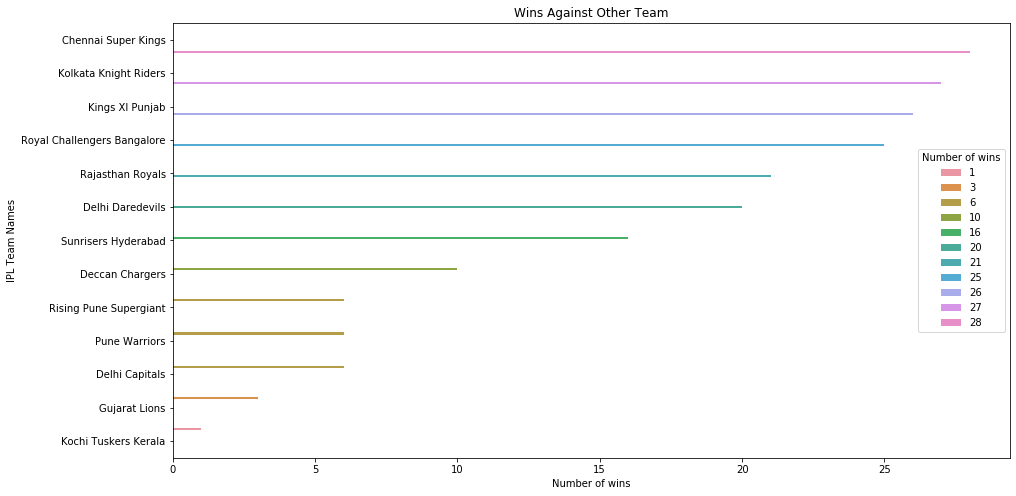

In [85]:
# how many ipl matches each team won against all other ipl teams?
def match_win_against_other(team_name):
    df1=df.groupby(['match_id','start_date','season','batting_team','bowling_team'])['run'].sum().reset_index(name='Total_runs')
    df1['ranks']=df1.groupby('match_id')['Total_runs'].rank(method='dense',ascending=False)
    df2=df1[df1['ranks']==1]
    df2=df2[df2['batting_team']==team_name]
    df2=df2.groupby(['batting_team','bowling_team'])['bowling_team'].count().sort_values(ascending=False).reset_index(name='Number of wins')
    df_win_count=df2.groupby(['batting_team'])['Number of wins'].sum()
    df_win_count[0]
    plt.figure(figsize=(15,8))
    sns.barplot(y='bowling_team',x='Number of wins',data=df2,hue='Number of wins')
    plt.ylabel('IPL Team Names')
    plt.title('Wins Against Other Team')
    return plt.show()
team_name=input('Enter Team Name ').title()
#print('Number of Win count',df_win_count[0])
match_win_against_other(team_name)

Enter Team Name chennai super kings


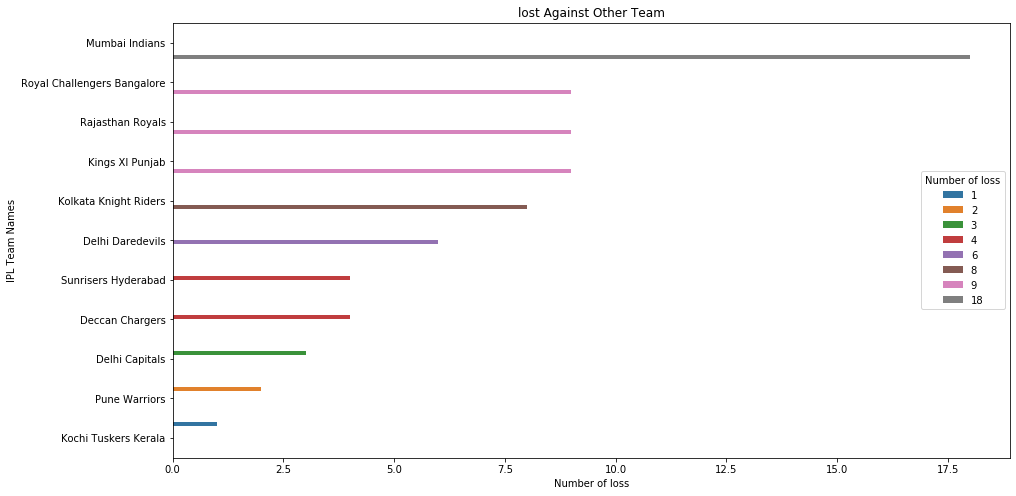

In [6]:
# how many ipl matches each team lost against all other ipl teams?
def match_lost_count(team_name):
    df1=df.groupby(['match_id','start_date','season','batting_team','bowling_team'])['run'].sum().reset_index(name='Total_runs')
    df1['ranks']=df1.groupby('match_id')['Total_runs'].rank(method='dense',ascending=False)
    df_loss=df1[df1['ranks']==2]
    df_loss=df_loss[df_loss['batting_team']==team_name]
    df_loss=df_loss.groupby(['batting_team','bowling_team'])['bowling_team'].count().sort_values(ascending=False).reset_index(name='Number of loss')
    df_loss_count=df_loss.groupby(['batting_team'])['Number of loss'].sum()
    plt.figure(figsize=(15,8))
    sns.barplot(y='bowling_team',x='Number of loss',data=df_loss,hue='Number of loss')
    plt.ylabel('IPL Team Names')
    plt.title('lost Against Other Team')
    return plt.show()
team_name=input('Enter Team Name ').title()
#print('Number of lost matches',df_loss_count[0])
match_lost_count(team_name)

In [ ]:
# getting the name of the players
def team_names(name):
    name_of_the_player=df[df['batting_team']==name]['striker'].unique()
    return name_of_the_player
try:
    name=input('Enter Team Name ').title()
    team_names(name)
except:
    print('Error!!! Please Check the Entered Spelling')

Enter Player Name SR Tendulkar


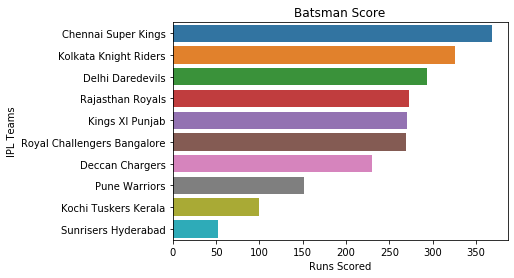

In [67]:
# Each indiviual player scored again each team in ipl
def datsman_score(player_name):
    batsman_score=df[df['striker']==player_name]
    batsman_score=batsman_score.groupby(['bowling_team'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='runs Scored Against Each Team')
    sns.barplot(x='runs Scored Against Each Team',y='bowling_team',data=batsman_score)
    plt.xlabel('Runs Scored')
    plt.ylabel('IPL Teams')
    plt.title('Batsman Score')
    return plt.show()
try:
    name=input('Enter Player Name ')
    datsman_score(name)
except:
    print('Error!!! Please check the spelling Lower and Upper case')

Enter Batsman Name SR Tendulkar


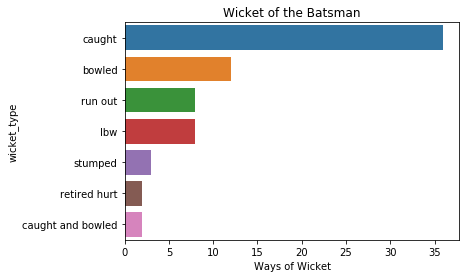

In [68]:
# How many ways a batsman got OUT?
def ways_of_wicket(batsman_name):
    wicket_types=df[df['wicket_type']!=' '] 
    name=wicket_types[wicket_types['striker']==batsman_name]
    name=name.groupby(['wicket_type'])['striker'].count().sort_values(ascending=False).reset_index(name='Ways of Wicket')
    sns.barplot(y='wicket_type',x='Ways of Wicket',data=name)
    plt.title('Wicket of the Batsman')
    return plt.show()
try:
    batsman_name=input('Enter Batsman Name ')
    ways_of_wicket(batsman_name)
except:
    print('Error!!! Please Check the spelling of the Batsman')

In [9]:
#df.striker.unique()

In [8]:
#df[df['batting_team']=='Mumbai Indians'].bowler.unique()

In [7]:
# Batsman against one bowler
def batsman_vs_bowler(batsman_name,bowler_name):
    batsman=df[df['striker']==batsman_name]
    bowler=batsman[batsman['bowler']==bowler_name] 
    runs_scored=bowler.groupby(['striker','bowler'])['runs_off_bat'].sum().reset_index(name='Runs Scored')
    wicket=bowler[bowler['wicket_type'].isin(['caught','bowled','lbw','stumped','caught and bowled','hit wicket'])]
    wicket=wicket.groupby(['striker','bowler'])['wicket_type'].count().reset_index(name='Wickets Taken')
    wicket=wicket[['striker','Wickets Taken']]
    bowler_6=bowler[bowler['runs_off_bat']==6]
    bowler_6=bowler_6.groupby(['striker','bowler'])['runs_off_bat'].count().reset_index(name='sixes')
    bowler_6=bowler_6[['striker','sixes']]
    bowler_4=bowler[bowler['runs_off_bat']==4]
    bowler_4=bowler_4.groupby(['striker','bowler'])['runs_off_bat'].count().reset_index(name='fours')
    bowler_4=bowler_4[['striker','fours']]
    final_df=pd.merge(runs_scored,bowler_6,on='striker',how='inner').merge(bowler_4,on='striker',how='inner').merge(wicket,on='striker',how='inner')
    return final_df
#try:
batsman_name=input('Enter Batsman Name ')
bowler_name=input('Enter Bowler Name ')
batsman_vs_bowler(batsman_name,bowler_name)
# except:
#     print('Error!!! please the check spellings entered')

Enter Batsman Name SR Tendulkar
Enter Bowler Name JH Kallis


,striker,bowler,Runs Scored,sixes,fours,Wickets Taken
0,SR Tendulkar,JH Kallis,39,1,4,2


In [69]:
# which team scored highest run against which team and which season
df1=df.groupby(['match_id','season','batting_team','bowling_team'])['run'].sum().sort_values(ascending=False).reset_index(name='highest_runs')
df1.sort_values(by='highest_runs',ascending=False)[:10]

,match_id,season,batting_team,bowling_team,highest_runs
0,598027,2013,Royal Challengers Bangalore,Pune Warriors,263
1,980987,2016,Royal Challengers Bangalore,Gujarat Lions,248
2,419137,2010,Chennai Super Kings,Rajasthan Royals,246
3,1136604,2018,Kolkata Knight Riders,Kings XI Punjab,245
4,335983,2008,Chennai Super Kings,Kings XI Punjab,240
5,829795,2015,Royal Challengers Bangalore,Mumbai Indians,235
6,1178422,2019,Kolkata Knight Riders,Mumbai Indians,232
7,501260,2011,Kings XI Punjab,Royal Challengers Bangalore,232
8,733987,2014,Kings XI Punjab,Chennai Super Kings,231
9,1175366,2019,Sunrisers Hyderabad,Royal Challengers Bangalore,231


In [70]:
# higheset run scored in an over by a batsman in ipl season
df1=df.groupby(['match_id','season','batting_team','bowling_team','striker','bowler','over'])['runs_off_bat'].sum().sort_values(ascending=False).reset_index(name='highest_runs')
df1.sort_values(by='highest_runs',ascending=False)[:10]

,match_id,season,batting_team,bowling_team,striker,bowler,over,highest_runs
0,501247,2011,Royal Challengers Bangalore,Kochi Tuskers Kerala,CH Gayle,P Parameswaran,2,36
1,734047,2014,Chennai Super Kings,Kings XI Punjab,SK Raina,P Awana,5,32
2,335988,2008,Delhi Daredevils,Deccan Chargers,V Sehwag,A Symonds,12,30
3,501260,2011,Kings XI Punjab,Royal Challengers Bangalore,SE Marsh,JJ van der Wath,14,30
4,548327,2012,Royal Challengers Bangalore,Pune Warriors,CH Gayle,R Sharma,12,30
5,980987,2016,Royal Challengers Bangalore,Gujarat Lions,V Kohli,S Kaushik,18,30
6,1216527,2020,Rajasthan Royals,Kings XI Punjab,R Tewatia,SS Cottrell,17,30
11,548318,2012,Chennai Super Kings,Royal Challengers Bangalore,JA Morkel,V Kohli,18,28
15,598027,2013,Royal Challengers Bangalore,Pune Warriors,CH Gayle,MR Marsh,4,28
14,1216542,2020,Kings XI Punjab,Sunrisers Hyderabad,N Pooran,Abdul Samad,8,28


In [74]:
#highest wicketen in which over by a bowler in which ipl season 
df1=df[~df['wicket_type'].isin([' ','run out'])]
df1=df1.groupby(['match_id','season','batting_team','bowling_team','bowler','over'])['wicket_type'].count().sort_values(ascending=False).reset_index(name='highest_wickets')
df1.sort_values(by='highest_wickets',ascending=False)[:10]

,match_id,season,batting_team,bowling_team,bowler,over,highest_wickets
0,598018,2013,Pune Warriors,Sunrisers Hyderabad,A Mishra,18,4
25,336013,2008,Kings XI Punjab,Chennai Super Kings,L Balaji,19,3
27,501233,2011,Kochi Tuskers Kerala,Delhi Daredevils,RE van der Merwe,18,3
28,980929,2016,Gujarat Lions,Sunrisers Hyderabad,B Kumar,19,3
29,1178395,2019,Royal Challengers Bangalore,Delhi Capitals,K Rabada,17,3
30,1136614,2018,Sunrisers Hyderabad,Kolkata Knight Riders,M Prasidh Krishna,19,3
31,501229,2011,Kochi Tuskers Kerala,Deccan Chargers,I Sharma,1,3
32,980955,2016,Gujarat Lions,Kings XI Punjab,AR Patel,6,3
33,1136600,2018,Rajasthan Royals,Kings XI Punjab,AJ Tye,19,3
34,501264,2011,Kings XI Punjab,Deccan Chargers,A Mishra,15,3


In [73]:
#highest wicketen in a season by a bowler in which ipl season 
df1=df[~df['wicket_type'].isin([' ','run out'])]
df1=df1.groupby(['season','bowling_team','bowler'])['wicket_type'].count().sort_values(ascending=False).reset_index(name='highest_wickets')
df1.sort_values(by='highest_wickets',ascending=False)[:10]

,season,bowling_team,bowler,highest_wickets
0,2013,Chennai Super Kings,DJ Bravo,32
1,2020,Delhi Capitals,K Rabada,32
2,2020,Mumbai Indians,JJ Bumrah,29
3,2013,Rajasthan Royals,JP Faulkner,28
4,2011,Mumbai Indians,SL Malinga,28
5,2015,Chennai Super Kings,DJ Bravo,26
6,2019,Chennai Super Kings,Imran Tahir,26
7,2019,Delhi Capitals,K Rabada,26
8,2017,Sunrisers Hyderabad,B Kumar,26
9,2012,Delhi Daredevils,M Morkel,25


# IPL Innings Wins and Lost Counts

In [65]:
df1=df.copy()

In [67]:
df2=df1.groupby(['match_id','season','batting_team','bowling_team'])['run'].sum().reset_index(name='runs_scored')
df2['ranks']=df2.groupby(['match_id'])['runs_scored'].rank(method='dense',ascending=False)
df2[:40]

,match_id,season,batting_team,bowling_team,runs_scored,ranks
0,335982,2008,Kolkata Knight Riders,Royal Challengers Bangalore,222,1.0
1,335982,2008,Royal Challengers Bangalore,Kolkata Knight Riders,82,2.0
2,335983,2008,Chennai Super Kings,Kings XI Punjab,240,1.0
3,335983,2008,Kings XI Punjab,Chennai Super Kings,207,2.0
4,335984,2008,Delhi Daredevils,Rajasthan Royals,132,1.0
5,335984,2008,Rajasthan Royals,Delhi Daredevils,129,2.0
6,335985,2008,Mumbai Indians,Royal Challengers Bangalore,165,2.0
7,335985,2008,Royal Challengers Bangalore,Mumbai Indians,166,1.0
8,335986,2008,Deccan Chargers,Kolkata Knight Riders,110,2.0
9,335986,2008,Kolkata Knight Riders,Deccan Chargers,112,1.0


In [249]:
df2.ranks.value_counts()

1.0    820
2.0    816
Name: ranks, dtype: int64

In [251]:
df3.Value.value_counts()

first_innings     818
second_innings    818
Name: Value, dtype: int64

In [69]:
df3=df2[['match_id','batting_team','bowling_team','runs_scored','ranks']]
# assign odd rows as 1 and even rows as 2
df3['Value'] = df3.index % 2 + 1
df3['ranks']=df3['ranks'].astype('int')
df3 

,match_id,batting_team,bowling_team,runs_scored,ranks,Value
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,222,1,1
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,82,2,2
2,335983,Chennai Super Kings,Kings XI Punjab,240,1,1
3,335983,Kings XI Punjab,Chennai Super Kings,207,2,2
4,335984,Delhi Daredevils,Rajasthan Royals,132,1,1
...,...,...,...,...,...,...
1631,1254058,Royal Challengers Bangalore,Mumbai Indians,160,1,2
1632,1254059,Chennai Super Kings,Delhi Capitals,188,2,1
1633,1254059,Delhi Capitals,Chennai Super Kings,190,1,2
1634,1254060,Kolkata Knight Riders,Sunrisers Hyderabad,187,1,1


In [70]:
df3['Value']=df3['Value'].replace({1:'first_innings',2:'second_innings'})

In [71]:
df3

,match_id,batting_team,bowling_team,runs_scored,ranks,Value
0,335982,Kolkata Knight Riders,Royal Challengers Bangalore,222,1,first_innings
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,82,2,second_innings
2,335983,Chennai Super Kings,Kings XI Punjab,240,1,first_innings
3,335983,Kings XI Punjab,Chennai Super Kings,207,2,second_innings
4,335984,Delhi Daredevils,Rajasthan Royals,132,1,first_innings
...,...,...,...,...,...,...
1631,1254058,Royal Challengers Bangalore,Mumbai Indians,160,1,second_innings
1632,1254059,Chennai Super Kings,Delhi Capitals,188,2,first_innings
1633,1254059,Delhi Capitals,Chennai Super Kings,190,1,second_innings
1634,1254060,Kolkata Knight Riders,Sunrisers Hyderabad,187,1,first_innings


Total first inning wins 818
                   batting_team  no_of_wins_first_innings
0           Chennai Super Kings                        67
7         Kolkata Knight Riders                        50
5               Kings XI Punjab                        47
8                Mumbai Indians                        45
3              Delhi Daredevils                        44
10             Rajasthan Royals                        30
12  Royal Challengers Bangalore                        29
1               Deccan Chargers                        21
13          Sunrisers Hyderabad                        18
2                Delhi Capitals                        17
4                 Gujarat Lions                        12
9                 Pune Warriors                         7
6          Kochi Tuskers Kerala                         4
11       Rising Pune Supergiant                         4


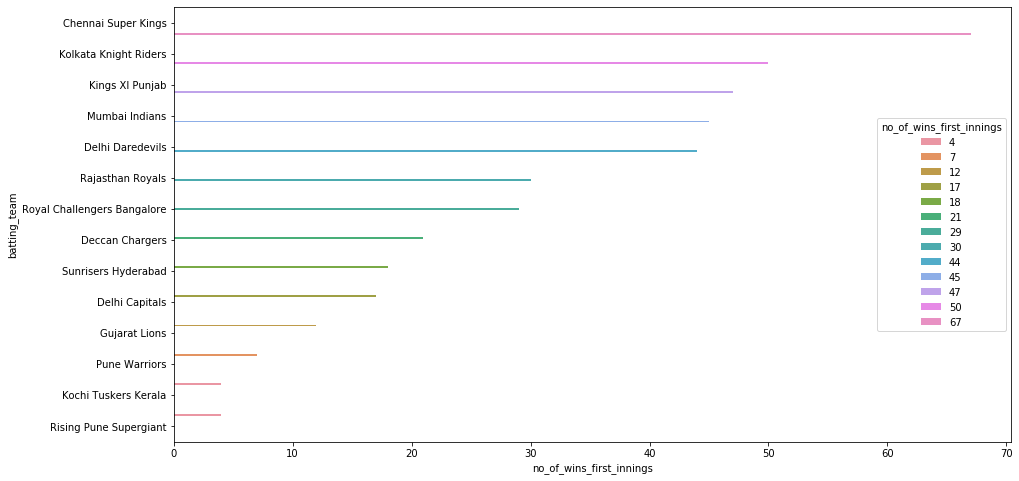

In [248]:
# number of first inning wins
df4=df3[df3['Value']=='first_innings']
df5=df4[df4['ranks']==1]
dffw=df5.groupby('batting_team')['Value'].count().reset_index(name='no_of_wins_first_innings').sort_values(by='no_of_wins_first_innings',ascending=False)
print('Total first inning wins', df4.Value.count())
print(dffw)
plt.figure(figsize=(15,8))
sns.barplot(x='no_of_wins_first_innings',y='batting_team',data=dffw,hue='no_of_wins_first_innings')
plt.show()

Total second inning wins 425
                   batting_team  no_of_wins_second_innings
8                Mumbai Indians                         75
12  Royal Challengers Bangalore                         64
10             Rajasthan Royals                         51
13          Sunrisers Hyderabad                         50
7         Kolkata Knight Riders                         49
5               Kings XI Punjab                         41
0           Chennai Super Kings                         39
3              Delhi Daredevils                         27
11       Rising Pune Supergiant                         10
1               Deccan Chargers                          8
9                 Pune Warriors                          5
2                Delhi Capitals                          3
6          Kochi Tuskers Kerala                          2
4                 Gujarat Lions                          1


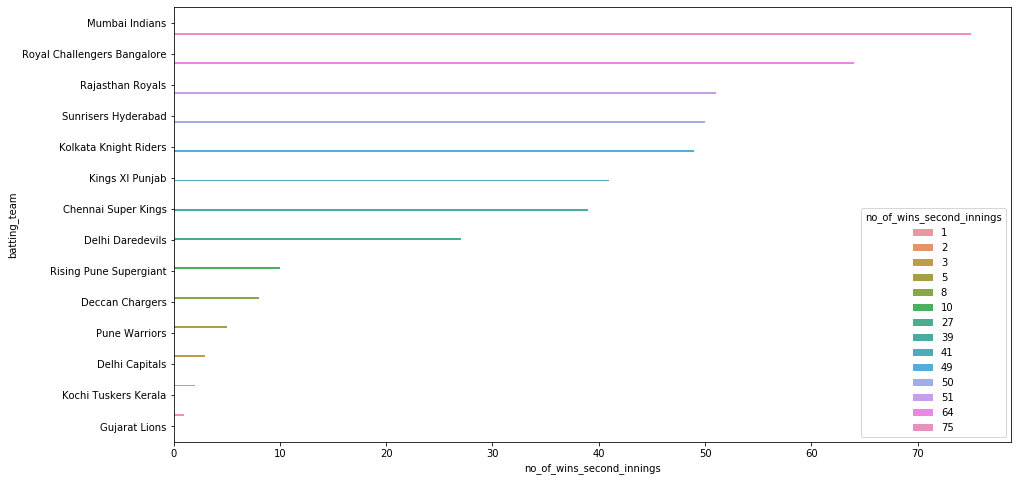

In [95]:
# number of second inning wins
df5=df3[(df3['Value']=='second_innings')&(df3['ranks']==1)]
dfsw=df5.groupby('batting_team')['Value'].count().reset_index(name='no_of_wins_second_innings').sort_values(by='no_of_wins_second_innings',ascending=False)
print('Total second inning wins', df5.Value.count())
print(dfsw)
plt.figure(figsize=(15,8))
sns.barplot(x='no_of_wins_second_innings',y='batting_team',data=dfsw,hue='no_of_wins_second_innings')
plt.show()

Total first inning loss 423
                   batting_team  no_of_lost_first_innings
5               Kings XI Punjab                        58
3              Delhi Daredevils                        52
0           Chennai Super Kings                        50
7         Kolkata Knight Riders                        50
8                Mumbai Indians                        44
1               Deccan Chargers                        33
10             Rajasthan Royals                        33
12  Royal Challengers Bangalore                        33
13          Sunrisers Hyderabad                        20
9                 Pune Warriors                        17
4                 Gujarat Lions                        14
2                Delhi Capitals                        11
6          Kochi Tuskers Kerala                         4
11       Rising Pune Supergiant                         4


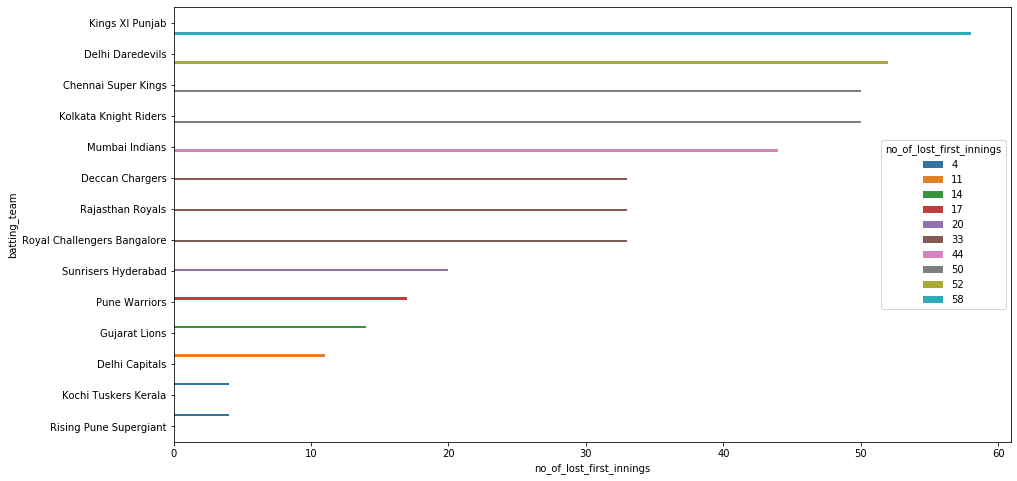

In [94]:
# number of first inning loss
df6=df3[(df3['Value']=='first_innings')&(df3['ranks']==2)]
dffl=df6.groupby('batting_team')['Value'].count().reset_index(name='no_of_lost_first_innings').sort_values(by='no_of_lost_first_innings',ascending=False)
print('Total first inning loss', df6.Value.count())
print(dffl)
plt.figure(figsize=(15,8))
sns.barplot(x='no_of_lost_first_innings',y='batting_team',data=dffl,hue='no_of_lost_first_innings')
plt.show()

Total second inning loss 393
                   batting_team  no_of_lost_second_innings
12  Royal Challengers Bangalore                         70
10             Rajasthan Royals                         46
5               Kings XI Punjab                         44
7         Kolkata Knight Riders                         44
8                Mumbai Indians                         40
3              Delhi Daredevils                         38
13          Sunrisers Hyderabad                         37
0           Chennai Super Kings                         23
9                 Pune Warriors                         16
1               Deccan Chargers                         13
11       Rising Pune Supergiant                         12
6          Kochi Tuskers Kerala                          4
2                Delhi Capitals                          3
4                 Gujarat Lions                          3


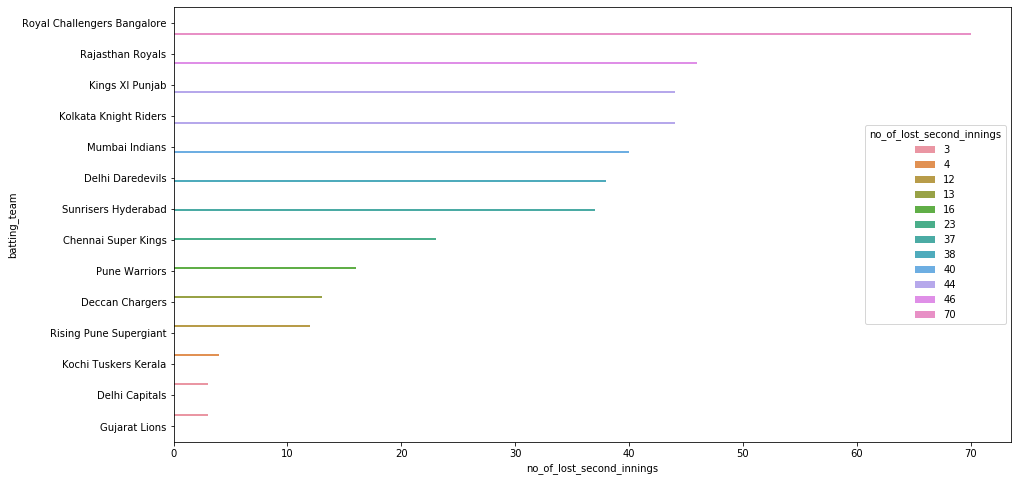

In [124]:
# number of second inning loss
df7=df3[(df3['Value']=='second_innings')&(df3['ranks']==2)]
df8=df7.groupby('batting_team')['Value'].count().reset_index(name='no_of_lost_second_innings').sort_values(by='no_of_lost_second_innings',ascending=False)
print('Total second inning loss', df7.Value.count())
print(df8)
plt.figure(figsize=(15,8))
sns.barplot(x='no_of_lost_second_innings',y='batting_team',data=df8,hue='no_of_lost_second_innings',errcolor='.90')
plt.show()

Total number of first innings wins and loss 818
                   batting_team  ranks  no_of_first_innings
0           Chennai Super Kings      1                   67
1           Chennai Super Kings      2                   50
3               Deccan Chargers      1                   21
2               Deccan Chargers      2                   33
4                Delhi Capitals      1                   17
5                Delhi Capitals      2                   11
7              Delhi Daredevils      1                   44
6              Delhi Daredevils      2                   52
9                 Gujarat Lions      1                   12
8                 Gujarat Lions      2                   14
11              Kings XI Punjab      1                   47
10              Kings XI Punjab      2                   58
12         Kochi Tuskers Kerala      1                    4
13         Kochi Tuskers Kerala      2                    4
14        Kolkata Knight Riders      1              

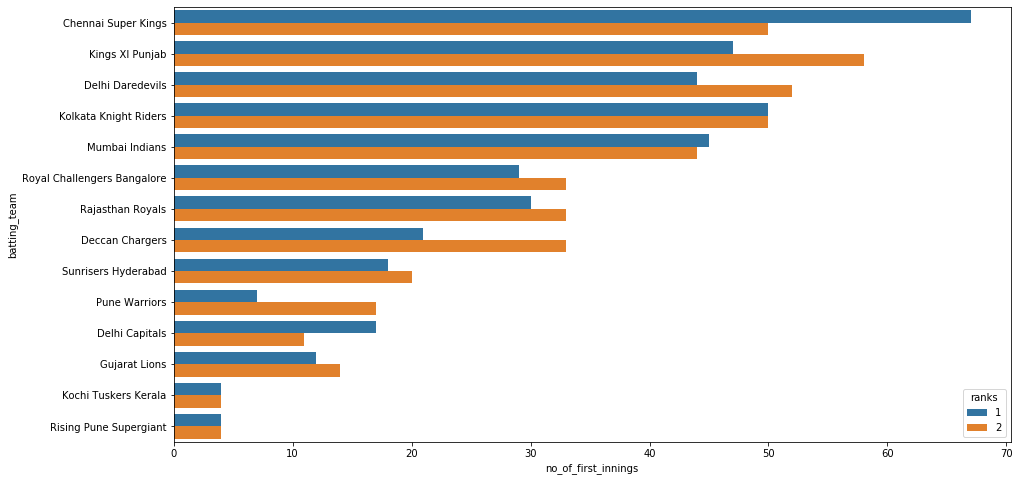

In [122]:
# number of first inning win and loss
dffi=df3[df3['Value']=='first_innings']
print('Total number of first innings wins and loss',dffi.Value.count())
dffi=dffi.groupby(['batting_team'])['ranks'].value_counts().reset_index(name='no_of_first_innings').sort_values(by='no_of_first_innings',ascending=False)
print(dffi.sort_values(by=['batting_team','ranks'],ascending=[True,True]))
plt.figure(figsize=(15,8))
sns.barplot(x='no_of_first_innings',y='batting_team',data=dffi,hue='ranks',errcolor='.50')
plt.show()

Total number of second innings wins and loss 818
                   batting_team  ranks  no_of_second_innings
0           Chennai Super Kings      1                    39
1           Chennai Super Kings      2                    23
3               Deccan Chargers      1                     8
2               Deccan Chargers      2                    13
4                Delhi Capitals      1                     3
5                Delhi Capitals      2                     3
7              Delhi Daredevils      1                    27
6              Delhi Daredevils      2                    38
9                 Gujarat Lions      1                     1
8                 Gujarat Lions      2                     3
11              Kings XI Punjab      1                    41
10              Kings XI Punjab      2                    44
13         Kochi Tuskers Kerala      1                     2
12         Kochi Tuskers Kerala      2                     4
14        Kolkata Knight Riders     

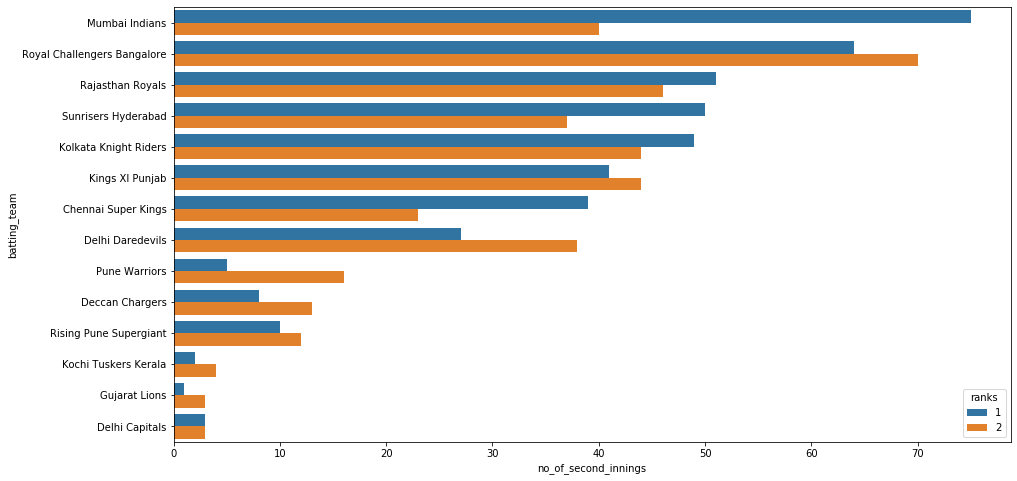

In [121]:
# number of second inning win and loss
dfsi=df3[df3['Value']=='second_innings']
print('Total number of second innings wins and loss',dfsi.Value.count())
dfsi=dfsi.groupby(['batting_team'])['ranks'].value_counts().reset_index(name='no_of_second_innings').sort_values(by='no_of_second_innings',ascending=False)
print(dfsi.sort_values(by=['batting_team','ranks'],ascending=[True,True]))
plt.figure(figsize=(15,8))
sns.barplot(x='no_of_second_innings',y='batting_team',data=dfsi,hue='ranks',errcolor='.50')
plt.show()

In [58]:

# create a sample dataframe
# data = {'A': [1, 2, 3, 4, 5, 6],
#         'B': [5, 6, 7, 8, 9, 10]}
# df = pd.DataFrame(data)

# # assign odd rows as 1 and even rows as 2
# df['Value'] = df.index % 2 + 1

# # print the updated dataframe
# print(df)
    

In [252]:
team_count=df.groupby(['batting_team'])['match_id'].nunique().reset_index(name='matches_played')
team_runs=df.groupby(['batting_team'])['run'].sum().reset_index(name='runs_scored')
team_win=df.groupby(['season','match_id','batting_team','bowling_team'])['run'].sum().reset_index(name='match_runs')
team_win['ranks']=team_win.groupby(['match_id'])['match_runs'].rank(method='dense',ascending=False)
team_win_count=team_win[team_win['ranks']==1]
team_win_count=team_win_count.groupby(['batting_team'])['ranks'].count().reset_index(name='matches_wins')
team_loss_count=team_win[team_win['ranks']==2]
team_loss_count=team_loss_count.groupby(['batting_team'])['ranks'].count().reset_index(name='matches_loss')

team_win['innings'] = team_win.index % 2 + 1
team_first_inn_win=team_win[(team_win['innings']==1) & (team_win['ranks']==1)]
team_first_inn_win=team_first_inn_win.groupby(['batting_team'])['ranks'].count().reset_index(name='first_inn_win_counts')
team_secong_inn_win=team_win[(team_win['innings']==2) & (team_win['ranks']==1)]
team_secong_inn_win=team_secong_inn_win.groupby(['batting_team'])['ranks'].count().reset_index(name='second_inn_win_counts')

ipl_tropy=df.groupby(['season','batting_team','bowling_team','start_date'])['run'].sum().reset_index(name='runs_scored')
ipl_tropy['start_date'] = pd.to_datetime(ipl_tropy['start_date'])
ipl_tropy_date=ipl_tropy.groupby(['season','batting_team','bowling_team','runs_scored'])['start_date'].max().reset_index(name='final_date')
ipl_tropy_date['ranks_date']=ipl_tropy_date.groupby(['season'])['final_date'].rank(method='dense',ascending=False)
ipl_tropy_date=ipl_tropy_date[ipl_tropy_date['ranks_date']==1]

ipl_tropy_date['ranks_run']=ipl_tropy_date.groupby(['season'])['runs_scored'].rank(method='dense',ascending=False) 
ipl_tropy_win=ipl_tropy_date[ipl_tropy_date['ranks_run']==1][:-1]
ipl_tropy_win =ipl_tropy_win.groupby(['batting_team'])['season'].count().reset_index(name='tropy_count')

ipl_tropy_runner=ipl_tropy_date[ipl_tropy_date['ranks_run']==2]
ipl_tropy_runner =ipl_tropy_runner.groupby(['batting_team'])['season'].count().reset_index(name='runner_count')
 
final_1=pd.merge(team_count,team_win_count,on='batting_team',how='inner').merge(team_loss_count,on='batting_team',how='left')
final_2=pd.merge(team_first_inn_win,team_secong_inn_win,on='batting_team',how='inner')
final_3=pd.merge(final_2,ipl_tropy_win,on='batting_team',how='left').merge(ipl_tropy_runner,on='batting_team',how='left')
final_4=pd.merge(final_1,team_runs,on='batting_team',how='inner') 
final_df=pd.merge(final_4,final_3,on='batting_team',how='inner')
final_df=final_df.fillna(0)
final_df.sort_values(by='tropy_count',ascending=False).reset_index(drop=True)

,batting_team,matches_played,matches_wins,matches_loss,runs_scored,first_inn_win_counts,second_inn_win_counts,tropy_count,runner_count
0,Mumbai Indians,204,120,84,32488,45,75,5.0,1.0
1,Chennai Super Kings,179,106,73,28560,67,39,3.0,5.0
2,Kolkata Knight Riders,193,99,94,29606,50,49,2.0,0.0
3,Deccan Chargers,75,29,46,11463,21,8,1.0,0.0
4,Rajasthan Royals,160,81,79,24542,30,51,1.0,0.0
5,Sunrisers Hyderabad,125,68,57,19539,18,50,1.0,2.0
6,Delhi Capitals,34,20,14,5499,17,3,0.0,1.0
7,Delhi Daredevils,161,71,90,24296,44,27,0.0,0.0
8,Gujarat Lions,30,13,17,4862,12,1,0.0,0.0
9,Kings XI Punjab,190,88,102,30064,47,41,0.0,1.0
